### Importing Python Libraries

In [29]:
%matplotlib inline
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import random

### Loading the Mnist Dataset

In [2]:
def dataset_load(root="../mnist_project/data"):    
    train_data = torchvision.datasets.MNIST(root=root, train=True, transform=transforms.ToTensor(), download=False)
    test_tens = torchvision.datasets.MNIST(root=root, train=False, transform=transforms.ToTensor(), download=False)
    
    train_tens, val_tens = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(42))
    return train_tens, val_tens, test_tens

In [3]:
train_tensor, val_tensor, test_tensor = dataset_load()

### Lengths of our subsets

In [4]:
len(train_tensor), len(val_tensor), len(test_tensor)

(50000, 10000, 10000)

### Random sample shape - 28x28 picture

In [5]:
train_tensor[0][0].shape, train_tensor[0][1]

(torch.Size([1, 28, 28]), 6)

### Iterating and Visualizing the dataset

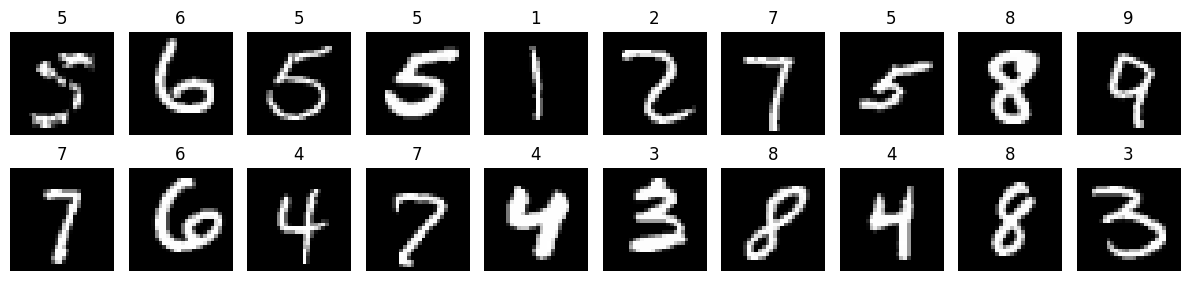

In [28]:
rand_idx = random.sample(range(0, len(train_tensor)), 20)

figure = plt.figure(figsize=(12, 3), tight_layout=True)

for i in range(len(rand_idx)):
    img, label = train_tensor[rand_idx[i]]
    figure.add_subplot(2, 10, i+1)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Easiest Linear Classification Model
##

### Data loaders

In [7]:
def data_loader(data, is_train):
    return torch.utils.data.DataLoader(data, batch_size=64, shuffle=is_train)

In [8]:
def test_loader(data):
    return torch.utils.data.DataLoader(data, batch_size=64)

### Testing loaders

In [25]:
X_1, y_1 = next(iter(data_loader(train_tensor, True)))
print("Shapes:", X_1.shape, X_1.dtype, y_1.shape, y_1.dtype, '\n')
print(y_1, '\n')
print(X_1.min(), X_1.max())

Shapes: torch.Size([64, 1, 28, 28]) torch.float32 torch.Size([64]) torch.int64 

tensor([6, 4, 2, 3, 5, 3, 1, 7, 5, 5, 4, 7, 6, 7, 4, 8, 3, 0, 5, 9, 2, 3, 7, 3,
        7, 1, 3, 7, 4, 8, 1, 6, 8, 4, 1, 5, 0, 6, 7, 7, 4, 6, 2, 4, 4, 7, 4, 9,
        3, 6, 4, 3, 6, 1, 5, 5, 1, 3, 2, 6, 9, 6, 6, 3]) 

tensor(0.) tensor(1.)


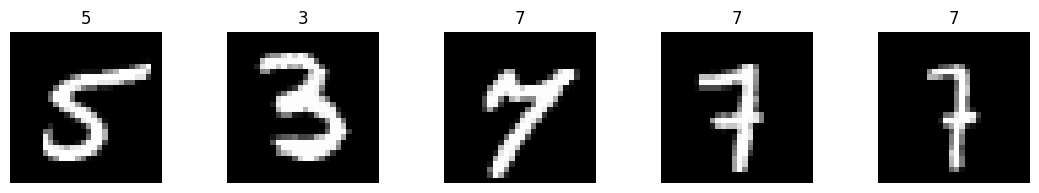

In [24]:
rand_idx = random.sample(range(0, 64), 5)
figure = plt.figure(figsize=(11, 2), tight_layout=True)
for i in range(len(rand_idx)):
    img, label = X_1[i], y_1[i]
    figure.add_subplot(1, 5, i+1)
    plt.title(label.item())
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Baseline Model

In [30]:
class BaseModel(nn.Module):
    def __init__(self, lr, num_outputs):
        self.lr = lr
        self.num_outputs = num_outputs
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(self.num_outputs))

    def forward(self, X):
        return self.net(X)